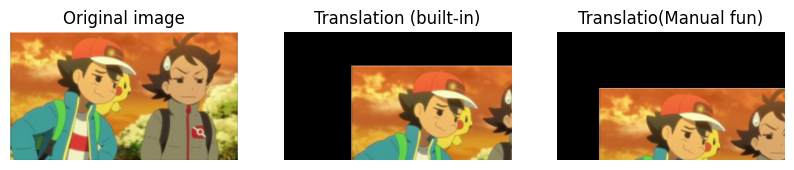

In [1]:
import cv2
import numpy as np,matplotlib.pyplot as plt

pic = cv2.imread("ashgoh.png")
image = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB )

Tx, Ty = 240, 120
height, width, channels = image.shape

#translation matrix (3x3) for affine transformation
M = np.float32([[1, 0, Tx], [0, 1, Ty]])
trbui_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

#using manual
def translate_image(image, tx, ty):
    # Create an empty image of the same size, initialized to 0 (black)
    translated_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = x + tx
            new_y = y + ty
            if 0 <= new_x < width and 0 <= new_y < height:
                translated_image[new_y, new_x] = image[y, x]
    return translated_image
trman_image = translate_image(image, 150, 200)

def disp(ima,t,figs=(10,8)):
   plt.figure(figsize=figs)
   for i,(im,ti) in enumerate(zip(ima,t),1):
    plt.subplot(1,3,i)
    plt.imshow(im)
    plt.title(ti)
    plt.axis('off')
   plt.show()

img=[image,trbui_image,trman_image]
title=["Original image","Translation (built-in)","Translatio(Manual fun)"]

disp(img,title)





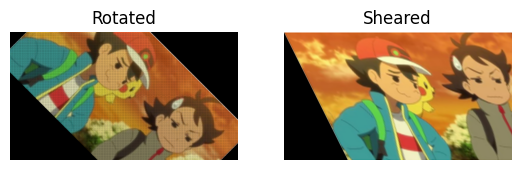

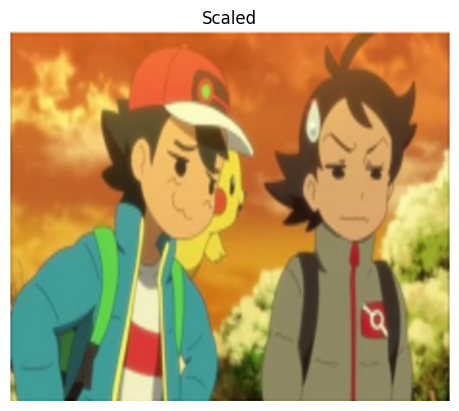

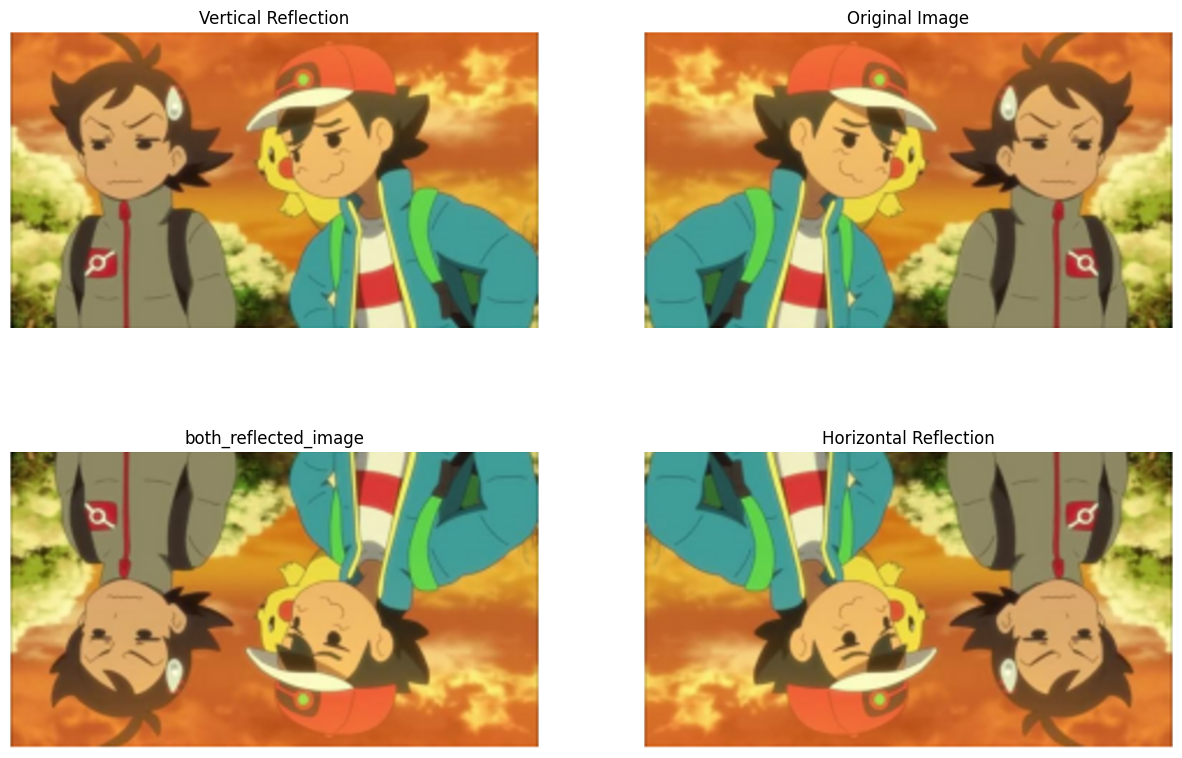

In [2]:


image = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB )
height, width, channels = image.shape
def rotate_image(image, angle):
    angle_rad = np.deg2rad(angle)
    cos_val = np.cos(angle_rad)
    sin_val = np.sin(angle_rad)

    # Center of the image
    cx, cy = width // 2, height // 2

    # Create an empty image of the same size
    rotated_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            # Translate coordinates relative to the center
            x_rel = x - cx
            y_rel = y - cy

            # Apply rotation
            new_x = int(cx + cos_val * x_rel - sin_val * y_rel)
            new_y = int(cy + sin_val * x_rel + cos_val * y_rel)

            # Check if the new coordinates are within bounds
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated_image[new_y, new_x] = image[y, x]

    return rotated_image


def shear_image(image, shear_factor_x, shear_factor_y):
    # Create an empty image of the same size
    sheared_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            # Apply shear transformation
            new_x = int(x + shear_factor_x * y)
            new_y = int(y + shear_factor_y * x)

            if 0 <= new_x < width and 0 <= new_y < height:
                sheared_image[new_y, new_x] = image[y, x]

    return sheared_image

# Perform transformations

# Rotation
rot_image = rotate_image(image, 45)  # Rotate by 45 degrees


# Shearing
she_image = shear_image(image, 0.5, 0)  # Shear along X-axis by factor of 0.5

def disp(ima,t,figs=(10,8)):
   plt.figure(figsize=figs)
   for i,(im,ti) in enumerate(zip(ima,t),1):
    plt.subplot(1,3,i)
    plt.imshow(im)
    plt.title(ti)
    plt.axis('off')
   plt.show()

img=[rot_image,she_image]
title=["Rotated","Sheared"]

disp(img,title)









# Scaling

def scale_image(image, fx, fy):
    # Create an empty image with new dimensions
    new_width = int(width * fx)
    new_height = int(height * fy)
    scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for y in range(new_height):
        for x in range(new_width):
            original_x = int(x / fx)
            original_y = int(y / fy)

            if original_x < width and original_y < height:
                scaled_image[y, x] = image[original_y, original_x]

    return scaled_image
sca_image = scale_image(image, 2, 3)

plt.imshow(sca_image)
plt.title("Scaled")
plt.axis('off')
plt.show()








def manual_vertical_reflection(image):
    height, width, channels = image.shape
    reflected_image = np.zeros_like(image)  # Create an empty image with the same shape

    for y in range(height):
        for x in range(width):
            # Flip the x-coordinate (horizontal reflection)
            reflected_image[y, width - x - 1] = image[y, x]

    return reflected_image

# 2. Manual Horizontal Reflection (Flip along the horizontal axis)
def manual_horizontal_reflection(image):
    height, width, channels = image.shape
    reflected_image = np.zeros_like(image)  # Create an empty image with the same shape

    for y in range(height):
        for x in range(width):
            # Flip the y-coordinate (vertical reflection)
            reflected_image[height - y - 1, x] = image[y, x]

    return reflected_image
# Manual reflection for both horizontal and vertical in one loop
def manual_both_reflection(image):
    height, width, channels = image.shape
    reflected_image = np.zeros_like(image)  # Create an empty image with the same shape

    for y in range(height):
        for x in range(width):
            # Flip both horizontally and vertically
            reflected_image[height - y - 1, width - x - 1] = image[y, x]

    return reflected_image

# Apply the transformation
both_reflected_image = manual_both_reflection(image)
vertical_reflected_image = manual_vertical_reflection(image)
horizontal_reflected_image = manual_horizontal_reflection(image)

# Function to display images with titles
def disp(ima, t, figs=(15,10)):
    plt.figure(figsize=figs)
    for i, (im, ti) in enumerate(zip(ima, t), 1):
        plt.subplot(2, 2, i)
        plt.imshow(im)
        plt.title(ti)
        plt.axis('off')
    plt.show()

# Image list and corresponding titles
img = [ vertical_reflected_image, image,both_reflected_image,horizontal_reflected_image]
title = [ "Vertical Reflection", "Original Image","both_reflected_image","Horizontal Reflection"]

# Display images
disp(img, title)





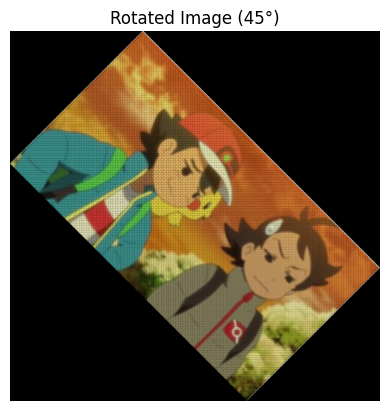

In [3]:





import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

# Function to rotate the image
def rotate_image(image, angle):
    angle_rad = np.deg2rad(angle)
    cos_val = np.cos(angle_rad)
    sin_val = np.sin(angle_rad)

    height, width = image.shape[:2]  # Get image dimensions

    # Calculate the new width and height of the rotated image
    new_width = int(abs(width * cos_val) + abs(height * sin_val))
    new_height = int(abs(height * cos_val) + abs(width * sin_val))

    # Center of the original image and the new image
    cx, cy = width // 2, height // 2
    new_cx, new_cy = new_width // 2, new_height // 2

    # Create an empty image with new dimensions (handling multiple channels)
    rotated_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for y in range(height):
        for x in range(width):
            # Translate coordinates relative to the center of the original image
            x_rel = x - cx
            y_rel = y - cy

            # Apply rotation transformation
            new_x = int(new_cx + cos_val * x_rel - sin_val * y_rel)
            new_y = int(new_cy + sin_val * x_rel + cos_val * y_rel)

            # Place the pixel in the rotated image if within bounds
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                rotated_image[new_y, new_x] = image[y, x]

    return rotated_image

# Rotate the image by 45 degrees
rotated_img = rotate_image(image, 45)

plt.imshow(rotated_img)
plt.title('Rotated Image (45°)')
plt.axis('off')  # Hide axes
plt.show()











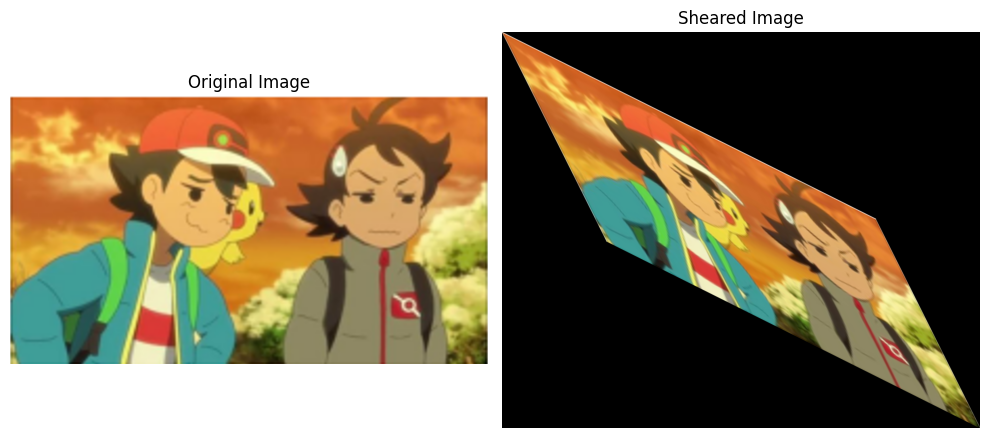

In [4]:





import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

def shear_image(image, shear_factor_x, shear_factor_y):
    height, width = image.shape[:2]  # Get image dimensions

    # Calculate the min and max extents of the sheared image
    min_x, max_x, min_y, max_y = 0, 0, 0, 0

    for y in range(height):
        for x in range(width):
            new_x = x + shear_factor_x * y
            new_y = y + shear_factor_y * x

            # Track the min and max extents
            min_x = min(min_x, new_x)
            max_x = max(max_x, new_x)
            min_y = min(min_y, new_y)
            max_y = max(max_y, new_y)

    # Calculate new image size based on the extents
    new_width = int(max_x - min_x)
    new_height = int(max_y - min_y)

    # Create an empty image with the new dimensions
    sheared_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    # Calculate offsets to shift coordinates into the new image space
    offset_x = -min_x
    offset_y = -min_y

    # Apply shear transformation and place pixels in the new image
    for y in range(height):
        for x in range(width):
            new_x = int(x + shear_factor_x * y + offset_x)
            new_y = int(y + shear_factor_y * x + offset_y)

            # Ensure new coordinates are within the bounds of the new image
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                sheared_image[new_y, new_x] = image[y, x]

    return sheared_image

# Load an image (replace with the correct path to your image)
img = image

# Apply shearing with shear factors (example: shear_factor_x=0.5, shear_factor_y=0.5)
sheared_img = shear_image(img, shear_factor_x=0.5, shear_factor_y=0.5)

# Plot the original and sheared images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')  # Hide axes

# Sheared image
axs[1].imshow(sheared_img)
axs[1].set_title('Sheared Image')
axs[1].axis('off')  # Hide axes

plt.tight_layout()
plt.show()